# Pre-processing & Training Data Development

## objective
The objective of this step is to prepare the raw data for modeling and develop a high-quality dataset suitable for training machine learning models.

## steps
#### Data Encoding:
Convert categorical variables into numerical representations using techniques like get_dummies().

#### Data Standardization:
Scale numerical features to improve model convergence and performance.

#### Data Splitting:
Split the dataset into training, validation, and testing sets.

In [7]:
#start by importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

## Data loading into notebook:

In [4]:
#load data inot my notebook
df = pd.read_csv(r"preprocessed_data2.csv")
df.head()

,merchant,category,amt,city,state,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,day,year,month,hour
0,Rau and Sons,grocery_pos,314.70,Glendale,CA,34.1556,-118.2322,172817,83,33.283670,-118.654974,1,Sat,2019,9,3
1,"Connelly, Reichert and Fritsch",gas_transport,43.51,Mesa,ID,44.6255,-116.4493,129,59,45.456663,-116.555030,0,Wed,2020,1,6
2,Friesen Inc,shopping_pos,795.01,Parker Dam,CA,34.2980,-114.1560,126,32,34.922036,-113.901876,1,Sun,2019,1,23
3,"Mosciski, Ziemann and Farrell",shopping_net,8.25,Hooper,NE,41.6414,-96.5232,1745,51,42.557041,-96.231715,0,Sun,2020,2,14
4,Brown PLC,misc_net,715.01,Carroll,NE,42.2770,-97.1926,566,49,42.175045,-97.983932,1,Sun,2020,2,23


## Exploring data:

In [5]:
#running info() on the data to learn insight
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3564 entries, 0 to 3563
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   merchant    3564 non-null   object 
 1   category    3564 non-null   object 
 2   amt         3564 non-null   float64
 3   city        3564 non-null   object 
 4   state       3564 non-null   object 
 5   lat         3564 non-null   float64
 6   long        3564 non-null   float64
 7   city_pop    3564 non-null   int64  
 8   age         3564 non-null   int64  
 9   merch_lat   3564 non-null   float64
 10  merch_long  3564 non-null   float64
 11  is_fraud    3564 non-null   int64  
 12  day         3564 non-null   object 
 13  year        3564 non-null   int64  
 14  month       3564 non-null   int64  
 15  hour        3564 non-null   int64  
dtypes: float64(5), int64(6), object(5)
memory usage: 445.6+ KB


In [6]:
df.shape

(3564, 16)

## Data encoding:

In this step I will be applying data encoding (One-Hot Encoding) useing pandas get_dummies function to perform one-hot encoding on categorical variables. This converts categorical variables into numerical representations suitable for modeling.

In [11]:
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
encoded_df = pd.get_dummies(df, columns=cat_columns)
encoded_df

,amt,lat,long,city_pop,age,merch_lat,merch_long,is_fraud,year,month,...,state_UT,state_WA,state_WY,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,314.70,34.1556,-118.2322,172817,83,33.283670,-118.654974,1,2019,9,...,False,False,False,False,False,True,False,False,False,False
1,43.51,44.6255,-116.4493,129,59,45.456663,-116.555030,0,2020,1,...,False,False,False,False,False,False,False,False,False,True
2,795.01,34.2980,-114.1560,126,32,34.922036,-113.901876,1,2019,1,...,False,False,False,False,False,False,True,False,False,False
3,8.25,41.6414,-96.5232,1745,51,42.557041,-96.231715,0,2020,2,...,False,False,False,False,False,False,True,False,False,False
4,715.01,42.2770,-97.1926,566,49,42.175045,-97.983932,1,2020,2,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,115.17,39.8127,-120.6405,1725,57,40.731661,-120.065102,0,2019,10,...,False,False,False,False,False,False,False,True,False,False
3560,61.23,34.1556,-118.2322,172817,42,33.608860,-118.812071,0,2020,7,...,False,False,False,False,False,False,False,True,False,False
3561,53.18,47.2271,-117.0819,895,25,39.682099,-116.420291,0,2019,12,...,False,True,False,True,False,False,False,False,False,False
3562,745.05,39.7417,-133.1171,1920,27,39.682099,-132.392044,1,2020,12,...,False,False,False,False,False,False,False,False,False,True


## Data Standardization:

Here I will be selecting numerical features and assign them to num_features, and then standardize num_features. This ensures that numerical features have similar scales, which is important for machine learning algorithms.

In [14]:
#select numerical features and assign them to num_features
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#identify the scaler
scaler = StandardScaler()

#fit and transform the scaler
encoded_df[num_features] = scaler.fit_transform(encoded_df[num_features])

## Data splitting:

Split the dataset into training and testing subsets using train_test_split function. This ensures that the model's performance can be evaluated on unseen data.

In [16]:
#Here I will identify my splited features.
#Since is_fraud is my target feature, I will assign my entire DataFram features to X and drop is_fraud column.
X = encoded_df.drop(columns=['is_fraud'])

#Now assign is_fraud (target feature) to y.
y = encoded_df['is_fraud']

In [21]:
#Now I will perform the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
con_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy of the model is:", model.score(X_test, y_test))
print("Confusion matrix of the model is:", con_matrix)
print("Classification Report is:", class_report)

Accuracy of the model is: 0.8190743338008415
Confusion matrix of the model is: [[309  64]
 [ 65 275]]
Classification Report is:               precision    recall  f1-score   support

        -1.0       0.83      0.83      0.83       373
         1.0       0.81      0.81      0.81       340

    accuracy                           0.82       713
   macro avg       0.82      0.82      0.82       713
weighted avg       0.82      0.82      0.82       713



C:\Users\mutha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


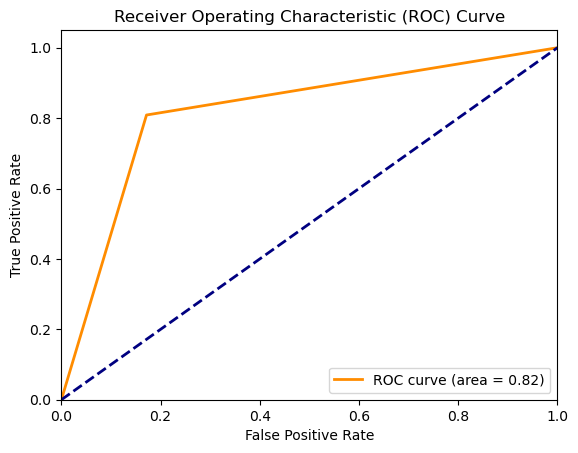

In [25]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Summary:

Now that we are at the end of this Notbook let's summarize the steps were taken.

### Data Loading:
In this step I loaded the data I previously worked on preprocessing.

### Data Exploring:
Here I explored my data to learn about the features and the types of data I will be working with.

### Data Encoding:
In this step applied data encoding (One-Hot Encoding) useing pandas get_dummies function to perform one-hot encoding on categorical variables. This converts categorical variables into numerical representations suitable for modeling.

### Data Standardization:
Here I selected only numerical features and assigned them to num_features, and then standardize num_features. This ensures that numerical features have similar scales, which is important for machine learning algorithms.

### Data splitting:
Split the dataset into training and testing subsets using train_test_split function. This ensures that the model's performance can be evaluated on unseen data.

### Conclusion and Results
In this study, we developed and trained a logistic regression model to predict is_fraud. The goal of the model was to detect fradulant transactions.
The logistic regression model achieved promising results, with the following performance metrics on the test dataset:

- Accuracy: 0.82
- Confusion Matrix: *True Negatives (TN): 309
                    *False Positives (FP): 64
                    *False Negatives (FN): 65
                    *True Positives (TP): 275
                    
| Metric      | Class -1.0 | Class 1.0 | 
|-------------|------------|-----------| 
| Precision   | 0.83       | 0.81      | 
| Recall      | 0.83       | 0.81      | 
| F1-score    | 0.83       | 0.81      | 
| Support     | 373        | 340       | 